In [13]:
import keras
keras.__version__

'2.2.4'

# 机器学习的四个分支

1、监督学习：分类、回归、光学字符识别、语言识别、图像分类、语言翻译   
         序列生成：给定一张图像，预测描述图像的文字。   
         语法书预测：给定一个句子，预测其分解生成的语法树   
         目标检测：给定一张图像，在图中特定目标的周围画一个边框   
         图像分割：给定一张图像，在特定物体上画一个像素级的掩模（mask）   
2、无监督学习： 方法：降维、聚类  
           目的：数据可视化、数据压缩、数据去噪、数据相关性  
3、自监督学习：  （1）没有人工标注的监督学习，可以看做没有人类参与的监督学习  
            （2）标签任然存在，但它们通常使用启发式算法从输入数据中生成的  
            （3）时序监督学习（从过去预测未来）是一种自监督学习  
4、强化学习：隐马尔可夫（MDP）模型  
5、相关术语：二分类：单个样本划分为两个互斥的类别  
         多分类：单个样本划分为多个互斥的类别  
         多标签分类：单个样本可以分配多个标签  
         标量回归：单个样本的目标是单个标量  
         向量回归：单个样本的目标是一个向量  
         批量：一次梯度更新的样本数量（一般区2的幂次方，8-128之间）  

# 评估机器学习模型

# 数据预处理、特征工程、特征学习

# 过拟合和欠拟合

In [2]:
from keras.datasets import imdb     # 在电影评论分类上测试
import numpy as np
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
np.load = np_load_old

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 减小网络大小

In [3]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [7]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 258us/step - loss: 0.0124 - acc: 0.9976 - val_loss: 0.8270 - val_acc: 0.8489
Epoch 2/20
25000/25000 [==============================] - 7s 276us/step - loss: 0.0101 - acc: 0.9981 - val_loss: 1.0218 - val_acc: 0.8319
Epoch 3/20
25000/25000 [==============================] - 7s 277us/step - loss: 0.0113 - acc: 0.9973 - val_loss: 0.9051 - val_acc: 0.8467
Epoch 4/20
25000/25000 [==============================] - 7s 280us/step - loss: 0.0072 - acc: 0.9984 - val_loss: 0.9327 - val_acc: 0.8476
Epoch 5/20
25000/25000 [==============================] - 7s 273us/step - loss: 0.0075 - acc: 0.9982 - val_loss: 0.9741 - val_acc: 0.8458
Epoch 6/20
25000/25000 [==============================] - 7s 263us/step - loss: 0.0078 - acc: 0.9979 - val_loss: 0.9991 - val_acc: 0.8458
Epoch 7/20
25000/25000 [==============================] - 7s 266us/step - loss: 0.0064 - acc: 0.9982 - val_loss: 1.0266 - 

In [8]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 259us/step - loss: 0.1810 - acc: 0.9847 - val_loss: 0.6519 - val_acc: 0.8508
Epoch 2/20
25000/25000 [==============================] - 7s 274us/step - loss: 0.1744 - acc: 0.9848 - val_loss: 0.7299 - val_acc: 0.8467
Epoch 3/20
25000/25000 [==============================] - 7s 271us/step - loss: 0.1673 - acc: 0.9854 - val_loss: 0.7276 - val_acc: 0.8472
Epoch 4/20
25000/25000 [==============================] - 7s 273us/step - loss: 0.1619 - acc: 0.9851 - val_loss: 0.7061 - val_acc: 0.8472
Epoch 5/20
25000/25000 [==============================] - 7s 273us/step - loss: 0.1557 - acc: 0.9856 - val_loss: 0.7995 - val_acc: 0.8444
Epoch 6/20
25000/25000 [==============================] - 7s 267us/step - loss: 0.1508 - acc: 0.9853 - val_loss: 0.7845 - val_acc: 0.8435
Epoch 7/20
25000/25000 [==============================] - 6s 249us/step - loss: 0.1447 - acc: 0.9859 - val_loss: 0.7581 - 

In [9]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Validation loss')

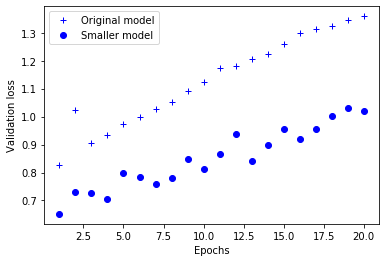

In [15]:
import matplotlib.pyplot as plt

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 更大的网络

In [11]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [12]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s - loss: 0.4539 - acc: 0.8011 - val_loss: 0.4150 - val_acc: 0.8229
Epoch 2/20
25000/25000 [==============================] - 3s - loss: 0.2148 - acc: 0.9151 - val_loss: 0.2742 - val_acc: 0.8901
Epoch 3/20
25000/25000 [==============================] - 3s - loss: 0.1217 - acc: 0.9544 - val_loss: 0.5442 - val_acc: 0.7975
Epoch 4/20
25000/25000 [==============================] - 3s - loss: 0.0552 - acc: 0.9835 - val_loss: 0.4316 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 3s - loss: 0.0662 - acc: 0.9888 - val_loss: 0.5098 - val_acc: 0.8822
Epoch 6/20
25000/25000 [==============================] - 3s - loss: 0.0017 - acc: 0.9998 - val_loss: 0.6867 - val_acc: 0.8811
Epoch 7/20
25000/25000 [==============================] - 3s - loss: 0.1019 - acc: 0.9882 - val_loss: 0.6737 - val_acc: 0.8800
Epoch 8/20
25000/25000 [==============================] - 3s 

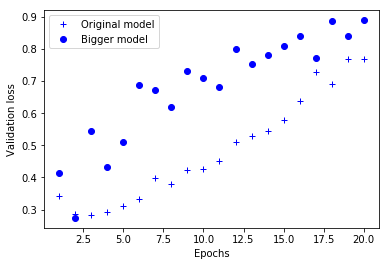

In [26]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

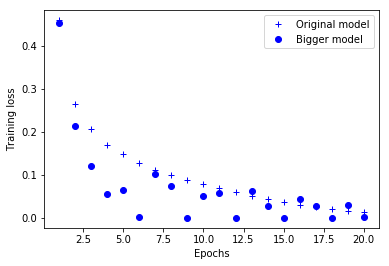

In [28]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

## 添加权重正则化
奥卡姆剃刀：一件事有两种解释，最可能正确的解释就是最简单的那个，即假设更少的那个。

In [17]:
from keras import regularizers

l2_model = models.Sequential() # regularizers.l1_l2(l1=0.001, l2=0.001) 同时做 L1 和 L2 正则化
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

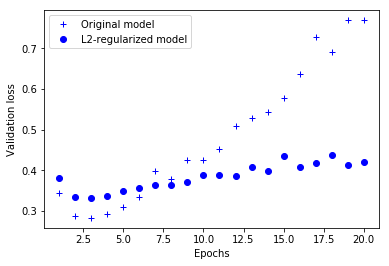

In [30]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

## 添加Dropout层

In [22]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

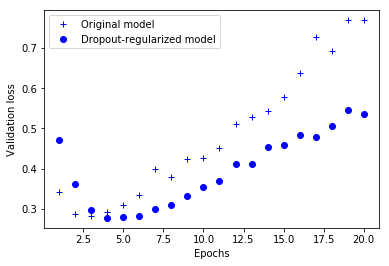

In [32]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 机器学习的通用工作流程

1、定义问题，收集数据
2、选择衡量指标：指标将指引你选择损失函数
   （1）平衡分类问题（每个类别可能性相同）：精度、接受者操作特征曲线下面积（ROC AUC），是常用指标
   （2）类别不平衡问题：准确率、召回率，是常用指标
   （3）排序问题，多标签分类：平均准确率均值
3、确定评估方法：留出方法、K折、重复的K折
4、准备（预处理）数据：张量化、归一化、标准化等
5、开发模型：|问题类型|            |最后一层激活|      |损失函数|
         |二分类问题           |sigmoid          |binary_crossentropy
         |多分类、单标签问题      |softmax          |categorical_crossentropy
         |多分类、多标签问题      |sigmoid          |binary_crossentropy
         |回归到任意值          |无             |mes
         |回归到[0,1 ]          |sigmoid          |mes或binary_crossentropy
6、扩大模型：使模型过拟合
7、模型正则化、调参数：Dropout层、增加或减少层数、L1L2正则化、尝试不同的超参数 等